In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

print("All libraries have been imported!")

All libraries have been imported!


In [3]:
#load data from the data.xlsx Excel file

df =pd.read_excel('data.xlsx') #reads the Excel file
print(df.head()) #lets you verify your data loaded correctly
print(f"Data shape: {df.shape}") #df.shape tells you how many rows and columns you have

   Student  Hours_Coding  Num_Bugs
0        1          10.7        25
1        2          24.8        50
2        3          19.4        38
3        4          16.2        31
4        5           5.3         3
Data shape: (50, 3)


In [4]:
#Confirming the column names
print("Column names:", df.columns.tolist())

Column names: ['Student', 'Hours_Coding', 'Num_Bugs']


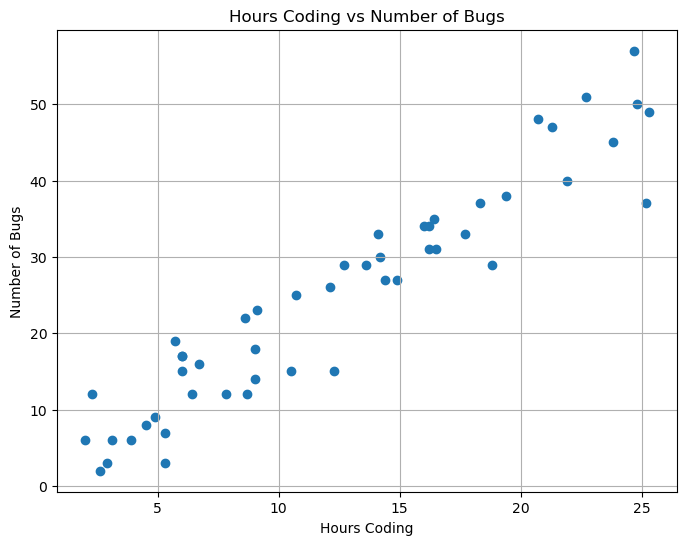

In [5]:
#the graph
plt.figure(figsize=(8,6))

#create a scatter plot
plt.scatter(df['Hours_Coding'], df['Num_Bugs'])

#Add labels and title
plt.xlabel('Hours Coding')
plt.ylabel('Number of Bugs')
plt.title('Hours Coding vs Number of Bugs')

#show the plot
plt.grid(True) #shows the grid-lines(squares)
plt.show()

In [6]:
#Pearson's Correlation Coefficient
correlation = df['Hours_Coding'].corr(df['Num_Bugs']) #calculates Pearson's correlation between the two columns

print(f"The correlation coefficient r = {correlation:.4f}")

The correlation coefficient r = 0.9494


In [7]:
#Regression Equation and prediction
#Num_Bugs = a + b*(Hours_Coding)

#Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Hours_Coding'], df['Num_Bugs'])

#print regression equation
print(f"Regression equation: Num_Bugs(y) ={intercept:.4f} + {slope:.4f} *Hours_Coding(x)")

#Predicting bugs for 20 hours of coding
prediction_20_hours = intercept + slope * 20
print(f"\nPredicted number of bugs for 20 hours of coding: {prediction_20_hours:.4f}")


Regression equation: Num_Bugs(y) =0.5585 + 1.9528 *Hours_Coding(x)

Predicted number of bugs for 20 hours of coding: 39.6143


In [8]:
#Frequency distribution of Num_Bugs
freq_table = df['Num_Bugs'].value_counts().sort_index()
#value.counts() counts how often each unique value appears
#sort_index() orders the counts in increasing order of bug count

freq_df = freq_table.reset_index()
freq_df.columns = ['Num_Bugs' , 'Frequency']
print("Frequency Distribution table for Number of Bugs: ")
print(freq_df)

Frequency Distribution table for Number of Bugs: 
    Num_Bugs  Frequency
0          2          1
1          3          2
2          6          3
3          7          1
4          8          1
5          9          1
6         12          4
7         14          1
8         15          3
9         16          1
10        17          2
11        18          1
12        19          1
13        22          1
14        23          1
15        25          1
16        26          1
17        27          2
18        29          3
19        30          1
20        31          2
21        33          2
22        34          2
23        35          1
24        37          2
25        38          1
26        40          1
27        45          1
28        47          1
29        48          1
30        49          1
31        50          1
32        51          1
33        57          1


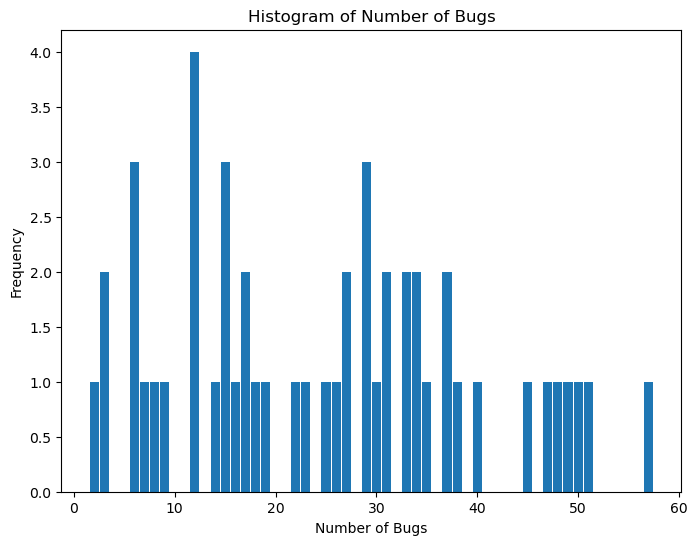

In [9]:
#Histogram of Number of Bugs
plt.figure(figsize=(8,6))
plt.bar(freq_df['Num_Bugs'], freq_df['Frequency'],width=0.9)
#plt.hist(df['Num_Bugs'].value_counts(), bins=20)

#Add labels and title to the histogram
plt.xlabel('Number of Bugs')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Bugs')
plt.show()

Mean Number of Bugs: 24.8200
Standard Deviation of Number of Bugs: 14.5626


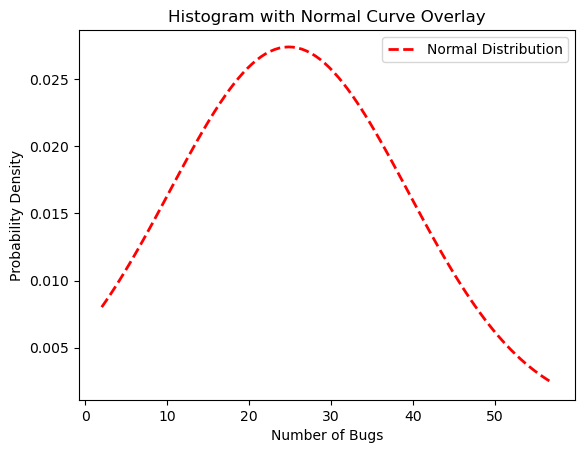

In [10]:
#Overlay a normal curve on the histogram(using sample mean and standard deviation)

#Calculate mean and standard deviation
mean_bugs = df['Num_Bugs'].mean()
print(f"Mean Number of Bugs: {mean_bugs:.4f}")
std_bugs=df['Num_Bugs'].std()
print(f"Standard Deviation of Number of Bugs: {std_bugs:.4f}")

#Generate Histogram
#plt.hist(df['Num_Bugs'], bins='auto', density=True)

#Generate normal curve
x = np.linspace(df['Num_Bugs'].min(), df['Num_Bugs'].max(), 100)
y = stats.norm.pdf(x, mean_bugs, std_bugs)
plt.plot(x, y, 'r--', linewidth=2, label='Normal Distribution')

#Add labels
plt.xlabel('Number of Bugs')
plt.ylabel('Probability Density')
plt.title('Histogram with Normal Curve Overlay')
plt.legend()
plt.show()